# Preprocessing:    

In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips

In [2]:
import numpy as np
import pywt
import cv2    
from matplotlib import pyplot as plt

def w2d(img, mode='haar', level=1):
    imArray = img
    
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    imArray =  np.float32(imArray)   
    imArray /= 255;
     
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    coeffs_H=list(coeffs)  
    #removes the low-frequency component from the decomposition, focus on image details or features
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

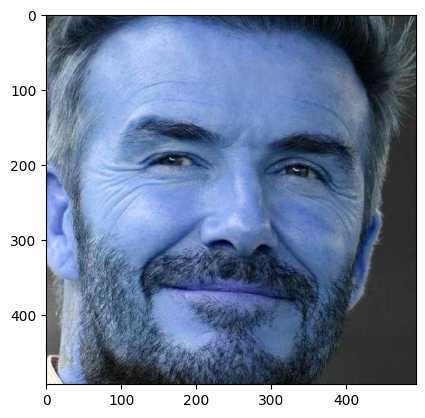

In [3]:
cropped_img = cv2.imread('./dataset/cropped/david beckham/david beckham24.png')
plt.imshow(cropped_img)

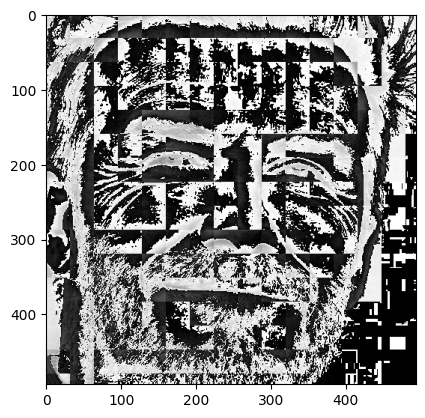

In [4]:
#level: detail finer small scale, mode: smooth capture
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [6]:
import os 
cropped_image_dirs = ['./dataset/cropped/alisson becker',
                      './dataset/cropped/cristiano ronaldo',
                      './dataset/cropped/david beckham',
                      './dataset/cropped/erling haaland',
                      './dataset/cropped/kevin de bruyne',
                      './dataset/cropped/kylian mbappe',
                      './dataset/cropped/lionel messi',
                      "./dataset/cropped/n'golo kante",
                      './dataset/cropped/neymar face',
                      './dataset/cropped/virgil van dijk']

In [7]:
footballer_names_dict = {}
for img_dir in cropped_image_dirs:
    footballer_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    footballer_names_dict[footballer_name] = file_list
footballer_names_dict

{'alisson becker': ['./dataset/cropped/alisson becker\\alisson becker1.png',
  './dataset/cropped/alisson becker\\alisson becker10.png',
  './dataset/cropped/alisson becker\\alisson becker11.png',
  './dataset/cropped/alisson becker\\alisson becker12.png',
  './dataset/cropped/alisson becker\\alisson becker13.png',
  './dataset/cropped/alisson becker\\alisson becker14.png',
  './dataset/cropped/alisson becker\\alisson becker15.png',
  './dataset/cropped/alisson becker\\alisson becker16.png',
  './dataset/cropped/alisson becker\\alisson becker17.png',
  './dataset/cropped/alisson becker\\alisson becker18.png',
  './dataset/cropped/alisson becker\\alisson becker19.png',
  './dataset/cropped/alisson becker\\alisson becker2.png',
  './dataset/cropped/alisson becker\\alisson becker20.png',
  './dataset/cropped/alisson becker\\alisson becker21.png',
  './dataset/cropped/alisson becker\\alisson becker22.png',
  './dataset/cropped/alisson becker\\alisson becker24.png',
  './dataset/cropped/ali

In [8]:
classi_dict = {}
count = 0
for footballer_name in footballer_names_dict.keys():
    classi_dict[footballer_name] = count
    count = count + 1
classi_dict

{'alisson becker': 0,
 'cristiano ronaldo': 1,
 'david beckham': 2,
 'erling haaland': 3,
 'kevin de bruyne': 4,
 'kylian mbappe': 5,
 'lionel messi': 6,
 "n'golo kante": 7,
 'neymar face': 8,
 'virgil van dijk': 9}

In [9]:
X = []
y = []
for footballer_name, training_files in footballer_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(classi_dict[footballer_name])    

3 raw images with 1 w2d image combine 

In [56]:
len(X[0])

4096

In [55]:
y[55]

1

In [12]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(405, 4096)

In [13]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5490196078431373

In [15]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.47      0.60      0.53        15
           2       0.43      0.55      0.48        11
           3       0.55      0.80      0.65        15
           4       1.00      0.10      0.18        10
           5       0.62      0.53      0.57        15
           6       0.70      0.88      0.78         8
           7       0.00      0.00      0.00         1
           8       0.40      0.29      0.33         7
           9       0.50      0.50      0.50        12

    accuracy                           0.55       102
   macro avg       0.57      0.49      0.48       102
weighted avg       0.60      0.55      0.53       102



In [16]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [17]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [18]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.627213,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.379290,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.660219,{'logisticregression__C': 1}


In [19]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [20]:
best_estimators['svm'].score(X_test,y_test)

0.6372549019607843

In [21]:
best_estimators['random_forest'].score(X_test,y_test)

0.3235294117647059

In [22]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7254901960784313

In [23]:
best_clf = best_estimators['logistic_regression']

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  0,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 0, 10,  1,  0,  0,  0,  0,  0,  0,  4],
       [ 0,  1,  7,  1,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0, 14,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 13,  0,  0,  2,  0],
       [ 0,  0,  1,  0,  0,  0,  6,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  4,  0],
       [ 0,  2,  0,  0,  1,  0,  0,  0,  0,  9]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

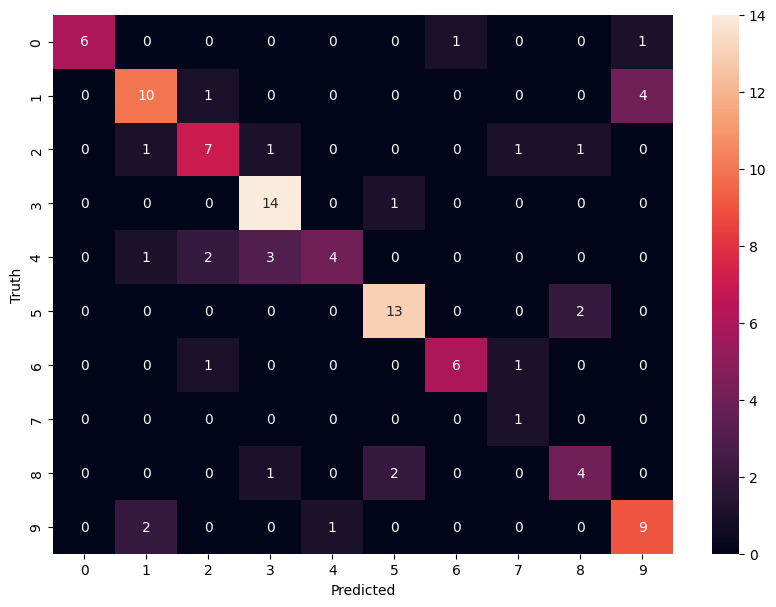

In [25]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
classi_dict

{'alisson becker': 0,
 'cristiano ronaldo': 1,
 'david beckham': 2,
 'erling haaland': 3,
 'kevin de bruyne': 4,
 'kylian mbappe': 5,
 'lionel messi': 6,
 "n'golo kante": 7,
 'neymar face': 8,
 'virgil van dijk': 9}

In [27]:
#!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [28]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(classi_dict))

In [37]:
# import torch
# figure = plt.figure(figsize=(10, 8))
# cols, rows = 5, 5
# for i in range(1, cols * rows + 1):
#     sample_idx = torch.randint(len(X), size=(1,)).item()
#     img, label = X[sample_idx]
#     figure.add_subplot(rows, cols, i)
#     plt.title(label)
#     plt.axis("off")
#     plt.imshow(img.squeeze(), cmap="gray")
# plt.show()

In [35]:
file_path = 'saved_model.pkl'
loaded_object = joblib.load(file_path)

In [36]:
loaded_object

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, solver='liblinear'))])